<a href="https://colab.research.google.com/github/HammadSheharyar/FYDP-MODELS/blob/main/All_Models_Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Plant Disease Detection**

This dataset is recreated using offline augmentation from the original dataset. The original dataset can be found on [this github repo](https://github.com/spMohanty/PlantVillage-Dataset/tree/master/raw). This dataset consists of about 76K rgb images of healthy and diseased crop leaves which is categorized into 33 different classes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **1.1. Import Required Libraries**



In [52]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

#### **1.2. Test-Train Data**
**Split the dataset**

**os.walk()-->**This function gives the possibility to list the contents of a directory. For example, it is used to find out which files and subdirectories are in the current directory.

In [53]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # crawls inside folders
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="/content/drive/MyDrive/data/train"
test_dir="/content/drive/MyDrive/data/test"

**glob.glob()-->**It is a module that helps to list files in a specific folder in Python. Searches in subfolders.

In [54]:
 #train file image count
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*"))
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

4 Classes
1958 Train images
18 Test images


#### **1.3. ImageDataGenerator**

**ImageDataGenerator**,Data augmentation is used to increase the size of training set and to get more different image. Through Data augmentation we can prevent overfitting ,this refers to randomly changing the images in ways that shouldn’t impact their interpretation, such as horizontal flipping, zooming, and rotating
* **Rescale:** One of the many magnification parameters adjusts the pixel values of our image.
* **Shear_range:** counterclockwise shear angle in degrees
* **Zoom_range:** zoom
* **Horizontal_flip:** flip image horizontally

> Do not perform augmentation on validation and test data/validation set ,this might mislead the results


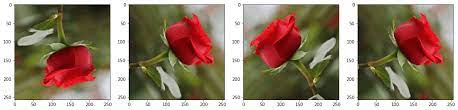

In [55]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)

**flow_from_directory() -->** Another method to read images into TensorFlow environment is to use the .flow_from_directory() method. flow_from_directory is an ImageDataGenerator method. The dataset is read with flow_from_directory without making any changes.

**Parameters:**
* **directory:** The path of the target directory. It must contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF formatted images found in each of the subdirectories will be included in the generator.
* **target_size:** A tuple of integers, (height, width), by default (256,256). All found images will be resized.
* **batch_size:** The size of the data chunks (default: 32).
* **shuffle:** Decides whether to shuffle data (default: True). If set to false, it sorts the data in alphanumeric order.



In [56]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 1958 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


## **Efficent Net ModelB0 1**

#Data testing

In [3]:
!ls '/content/drive/MyDrive/data'

test  train  val


In [4]:
!ls '/content/drive/MyDrive/data/train/'

'diseased cotton leaf'	'diseased cotton plant'  'fresh cotton leaf'  'fresh cotton plant'


In [5]:
!ls '/content/drive/MyDrive/data/train/diseased cotton leaf'

'dis_leaf (101)_iaip.jpg'  'dis_leaf (203)_iaip.jpg'  'dis_leaf (307)_iaip.jpg'
'dis_leaf (102)_iaip.jpg'  'dis_leaf (205)_iaip.jpg'  'dis_leaf (30)_iaip.jpg'
'dis_leaf (103)_iaip.jpg'  'dis_leaf (207)_iaip.jpg'  'dis_leaf (310)_iaip.jpg'
'dis_leaf (104)_iaip.jpg'  'dis_leaf (208)_iaip.jpg'  'dis_leaf (311)_iaip.jpg'
'dis_leaf (105)_iaip.jpg'  'dis_leaf (209)_iaip.jpg'  'dis_leaf (312)_iaip.jpg'
'dis_leaf (106)_iaip.jpg'  'dis_leaf (20)_iaip.jpg'   'dis_leaf (313)_iaip.jpg'
'dis_leaf (107)_iaip.jpg'  'dis_leaf (210)_iaip.jpg'  'dis_leaf (314)_iaip.jpg'
'dis_leaf (108)_iaip.jpg'  'dis_leaf (211)_iaip.jpg'  'dis_leaf (315)_iaip.jpg'
'dis_leaf (109)_iaip.jpg'  'dis_leaf (212)_iaip.jpg'  'dis_leaf (316)_iaip.jpg'
'dis_leaf (10)_iaip.jpg'   'dis_leaf (213)_iaip.jpg'  'dis_leaf (317)_iaip.jpg'
'dis_leaf (110)_iaip.jpg'  'dis_leaf (215)_iaip.jpg'  'dis_leaf (318)_iaip.jpg'
'dis_leaf (111)_iaip.jpg'  'dis_leaf (216)_iaip.jpg'  'dis_leaf (319)_iaip.jpg'
'dis_leaf (112)_iaip.jpg'  'dis_leaf (217

In [6]:
# Another way to find out how many images are in a file
num_diseased_Cotton_images_train = len(os.listdir("/content/drive/MyDrive/data/train/diseased cotton leaf"))

num_diseased_Cotton_images_train

288

In [7]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/data/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/data/'.
There are 4 directories and 0 images in '/content/drive/MyDrive/data/train'.
There are 0 directories and 428 images in '/content/drive/MyDrive/data/train/fresh cotton plant'.
There are 0 directories and 815 images in '/content/drive/MyDrive/data/train/diseased cotton plant'.
There are 0 directories and 427 images in '/content/drive/MyDrive/data/train/fresh cotton leaf'.
There are 0 directories and 288 images in '/content/drive/MyDrive/data/train/diseased cotton leaf'.
There are 4 directories and 0 images in '/content/drive/MyDrive/data/val'.
There are 0 directories and 55 images in '/content/drive/MyDrive/data/val/diseased cotton leaf'.
There are 0 directories and 80 images in '/content/drive/MyDrive/data/val/fresh cotton leaf'.
There are 0 directories and 88 images in '/content/drive/MyDrive/data/val/fresh cotton plant'.
There are 0 directories and 101 images in '/content/drive/MyDrive/data/val/diseased cotton pla

In [10]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[:] # remove .DS_store
print(class_names)

['diseased cotton leaf' 'diseased cotton plant' 'fresh cotton leaf'
 'fresh cotton plant']


In [11]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['dsd (629)_iaip.jpg']
Image shape: (694, 694, 3)


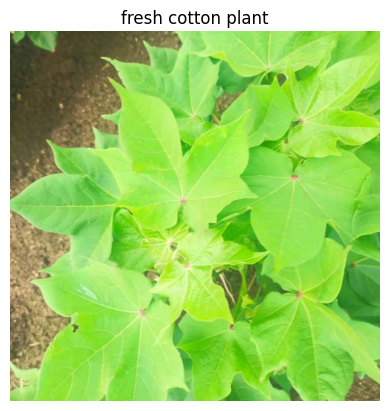

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/data/train/",
                        target_class="fresh cotton plant")

In [ ]:
224, 224, 3


(224, 224, 3)

In [13]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(694, 694, 3), dtype=uint8, numpy=
array([[[189, 150,  95],
        [212, 175, 120],
        [223, 188, 132],
        ...,
        [149, 222,  55],
        [151, 224,  57],
        [153, 226,  59]],

       [[178, 141,  88],
        [208, 173, 119],
        [228, 197, 142],
        ...,
        [149, 222,  55],
        [151, 224,  57],
        [152, 225,  58]],

       [[144, 112,  61],
        [178, 148,  96],
        [209, 184, 130],
        ...,
        [148, 221,  54],
        [150, 223,  56],
        [151, 224,  57]],

       ...,

       [[138, 208,  83],
        [137, 207,  82],
        [135, 205,  80],
        ...,
        [169, 148, 105],
        [168, 147, 104],
        [164, 143, 100]],

       [[143, 213,  88],
        [142, 212,  87],
        [140, 210,  85],
        ...,
        [168, 144, 100],
        [173, 149, 105],
        [173, 149, 105]],

       [[147, 217,  92],
        [146, 216,  91],
        [143, 213,  88],
        ...,
        [165, 138,  9

In [14]:
# View the image shape
img.shape # returns width, height, colour channels

(694, 694, 3)

In [15]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255.

array([[[0.74117647, 0.58823529, 0.37254902],
        [0.83137255, 0.68627451, 0.47058824],
        [0.8745098 , 0.7372549 , 0.51764706],
        ...,
        [0.58431373, 0.87058824, 0.21568627],
        [0.59215686, 0.87843137, 0.22352941],
        [0.6       , 0.88627451, 0.23137255]],

       [[0.69803922, 0.55294118, 0.34509804],
        [0.81568627, 0.67843137, 0.46666667],
        [0.89411765, 0.77254902, 0.55686275],
        ...,
        [0.58431373, 0.87058824, 0.21568627],
        [0.59215686, 0.87843137, 0.22352941],
        [0.59607843, 0.88235294, 0.22745098]],

       [[0.56470588, 0.43921569, 0.23921569],
        [0.69803922, 0.58039216, 0.37647059],
        [0.81960784, 0.72156863, 0.50980392],
        ...,
        [0.58039216, 0.86666667, 0.21176471],
        [0.58823529, 0.8745098 , 0.21960784],
        [0.59215686, 0.87843137, 0.22352941]],

       ...,

       [[0.54117647, 0.81568627, 0.3254902 ],
        [0.5372549 , 0.81176471, 0.32156863],
        [0.52941176, 0

In [16]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/data/train"
test_dir = "/content/drive/MyDrive/data/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training images:
Found 1958 images belonging to 4 classes.
Testing images:
Found 18 images belonging to 4 classes.


In [17]:
# Create TensorBoard callback (functionized beause we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [18]:
# Model using tensor hub
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [21]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [20]:
# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=4):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name="feature_extraction_lyaer",
                                           input_shape=IMAGE_SHAPE+(3,))

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [22]:
# Create EfficinetNetB0 feature extractor model - details on EfficientNet: https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html#:~:text=EfficientNet%2DB0%20is%20the%20baseline,than%20the%20best%20existing%20CNN.
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# Fit EfficientNet model to 10% of training data
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     experiment_name="efficientnetb0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20231024-101401
Epoch 1/5
62/62 [==============================] - 1426s 23s/step - loss: 0.8356 - accuracy: 0.7114 - val_loss: 0.4685 - val_accuracy: 0.9444
Epoch 2/5
62/62 [==============================] - 12s 187ms/step - loss: 0.3974 - accuracy: 0.9050 - val_loss: 0.3417 - val_accuracy: 0.9444
Epoch 3/5
62/62 [==============================] - 12s 188ms/step - loss: 0.2806 - accuracy: 0.9392 - val_loss: 0.2616 - val_accuracy: 0.9444
Epoch 4/5
62/62 [==============================] - 12s 186ms/step - loss: 0.2234 - accuracy: 0.9505 - val_loss: 0.2141 - val_accuracy: 0.9444
Epoch 5/5
62/62 [==============================] - 11s 176ms/step - loss: 0.1883 - accuracy: 0.9561 - val_loss: 0.1776 - val_accuracy: 0.9444


### **Evaluating our model**

In [23]:

# Evalaute on the test data
efficientnet_model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.1776 - accuracy: 0.9444


[0.17759795486927032, 0.9444444179534912]

In [58]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 18 images belonging to 4 classes.


In [68]:
print("[INFO] Calculating model accuracy")
scores = efficientnet_model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 2s 2s/step - loss: 0.2620 - accuracy: 0.9444
Test Accuracy: 94.44444179534912


In [64]:
print("[INFO] Calculating model accuracy")
scores = efficientnet_model.evaluate(train_data_10_percent)
print(f"Train Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
62/62 [==============================] - 10s 162ms/step - loss: 0.1704 - accuracy: 0.9612
Train Accuracy: 96.11848592758179


In [65]:
print("[INFO] Calculating model accuracy")
scores = efficientnet_model.evaluate(test_data)
print(f"Train Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 1s 1s/step - loss: 0.1776 - accuracy: 0.9444
Train Accuracy: 94.44444179534912


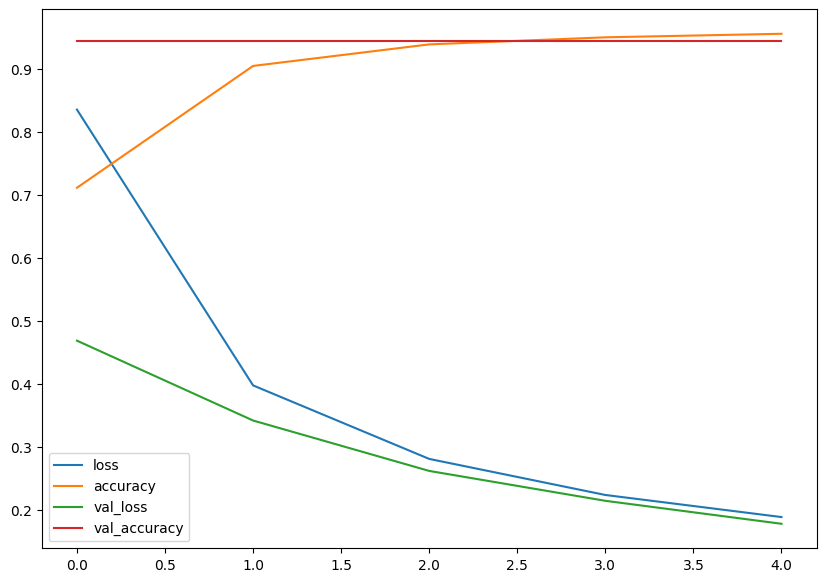

In [24]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(efficientnet_history.history).plot(figsize=(10, 7));


In [25]:
# Let's create a function to plot our loss curves...
# Tidbit: you could put a function like this into a script called "helper.py" and import it when you need it...
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


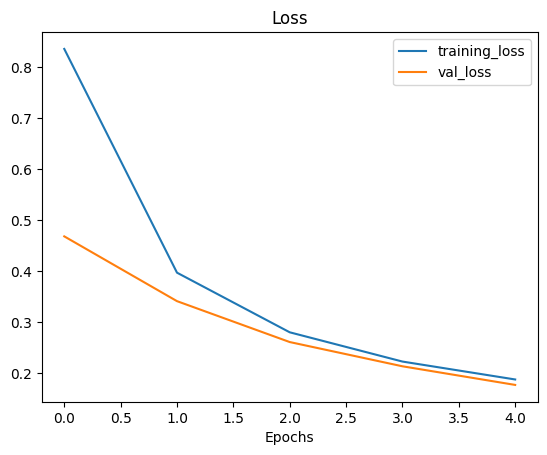

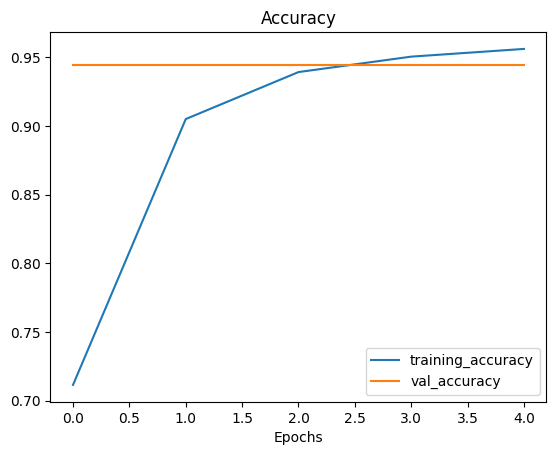

In [26]:
plot_loss_curves(efficientnet_history)

In [27]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_lyaer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4054688 (15.47 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [49]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [28]:
# How many layers does our efficientnetb0 feature extractor have?
len(efficientnet_model.layers[0].weights)

309

In [42]:
efficientnet_model.save('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_efficientnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Making a prediction with our trained model on our own custom data

In [29]:
# Classes we're working with
print(class_names)



['diseased cotton leaf' 'diseased cotton plant' 'fresh cotton leaf'
 'fresh cotton plant']


--2023-10-24 11:02:09--  https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/cottonDis.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214766 (210K) [image/webp]
Saving to: ‘cottonDis.webp’

cottonDis.webp      100%[===================>] 209.73K  --.-KB/s    in 0.02s   

2023-10-24 11:02:09 (13.3 MB/s) - ‘cottonDis.webp’ saved [214766/214766]



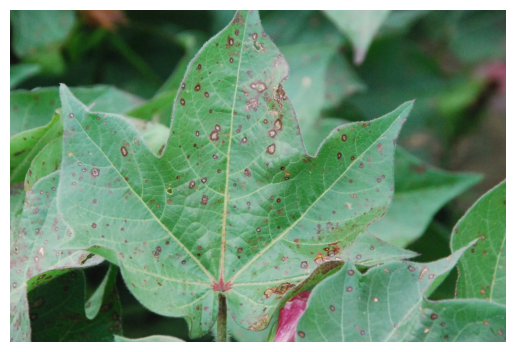

In [30]:
!wget https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/cottonDis.webp
disCottonImage = mpimg.imread("cottonDis.webp")
plt.imshow(disCottonImage)
plt.axis(False);


In [31]:
disCottonImage.shape

(1371, 2048, 3)

In [32]:
# # Create a function to import and image and resize it to be able to be used with our model
# def load_and_prep_image(filename, img_shape=224, scale=True):
#   """
#   Reads an image from filename, turns it into a tensor and reshapes it
#   to (img_shape, img_shape, colour_channels).
#   """
#   # Read in the image
#   img = tf.io.read_file(filename)
#   # Decode the read file into a tensor
#   img = tf.image.decode_image(img)
#   # Resize the image
#   img = tf.image.resize(img, size=[img_shape, img_shape])
#   # Rescale the image (get all values between 0 and 1)
#   # img = img/255.
#   if scale:
#     # Rescale the image (get all values between 0 and 1)
#     return img/255.
#   else:
#     return img


In [36]:
import io

In [37]:
from PIL import Image

def load_and_prep_image(filename, img_shape=224, scale=True):
    """
    Reads an image from filename, converts it to a format compatible with the model,
    and resizes it to (img_shape, img_shape, colour_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # Check the image format using the file extension
    if filename.endswith('.webp'):
        # Convert the WebP image to PNG format (or any other supported format)
        with Image.open(io.BytesIO(img.numpy())) as pil_image:
            # Create a temporary buffer to save the image
            buffer = io.BytesIO()
            # Save the image as PNG (you can choose a different format if needed)
            pil_image.save(buffer, format='PNG')
            # Get the image data in PNG format
            img = buffer.getvalue()
        img = tf.convert_to_tensor(img)

    # Decode the image into a tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    if scale:
        # Rescale the image (get all values between 0 and 1)
        return img / 255.
    else:
        return img


In [38]:
# Load in and preprocess our custom image
disCottonImage = load_and_prep_image("cottonDis.webp")
disCottonImage

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.26218486, 0.39551818, 0.2859944 ],
        [0.18174708, 0.36213923, 0.23800394],
        [0.17270972, 0.35310185, 0.22933611],
        ...,
        [0.14856477, 0.24017347, 0.17350681],
        [0.15419292, 0.2539566 , 0.18336834],
        [0.16438983, 0.26431012, 0.20360552]],

       [[0.23529412, 0.38039216, 0.2627451 ],
        [0.17396708, 0.36612394, 0.23938201],
        [0.16943215, 0.35766745, 0.24002038],
        ...,
        [0.14872113, 0.2594783 , 0.18793683],
        [0.17002265, 0.27099985, 0.20041163],
        [0.14935601, 0.23946285, 0.18072855]],

       [[0.22252588, 0.38723177, 0.25289488],
        [0.19529937, 0.37883404, 0.25412288],
        [0.17398834, 0.38070914, 0.2583615 ],
        ...,
        [0.16074577, 0.27082786, 0.19681895],
        [0.17820556, 0.276918  , 0.20941122],
        [0.1700745 , 0.26986474, 0.20784314]],

       ...,

       [[0.5669592 , 0.6089399 , 0.58675003],
        [0.57

In [39]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

## Evaluated our Model with random cotton image from Google

1/1 [==============================] - 0s 52ms/step


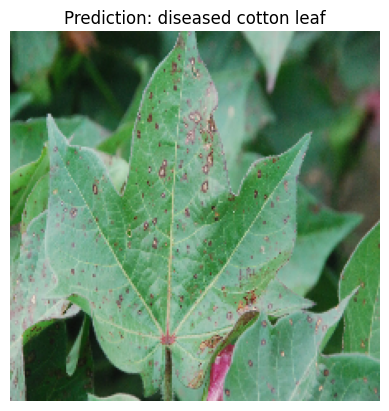

In [41]:
# Make a prediction using model_10
pred_and_plot(model=efficientnet_model,
              filename="cottonDis.webp",
              class_names=class_names)

Our model has classified the image correctly.

#### **1.4. CNN Model**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 18 images belonging to 4 classes.


When compiling the model, we provide **objective function (loss)**, **optimization method (adam)** and **accuracy** that we will follow.

For training, the 'fit()' function is used in the model with the following parameter:
* **train:** training data,
* **validation_data:** validation set,
* **shuffle:** change of location of data in each epoch,
* **verbose:** to be able to see the outputs during the training (0-> does not show, 1-> does)
* **epoch:** determines how many times the dataset will be trained by traversing the model
* **callbacks:** An object that can perform actions at various stages of training (for example, at the beginning or end of a period, before or after a single batch, etc.).

**ReduceLROnPlateau():** Models benefit from reducing the learning rate by 2-10 times when learning becomes sluggish. If it checks and no improvement is seen for the 'patience' count, the learning rate drops.
* **monitor**: value to monitor
* **factor:** factor by which the learning rate will be reduced
* **patience: the number of non-development periods after which the learning rate will decrease
* **min_lr:** lower limit of learning rate


In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(
    train_generator,#egitim verileri
    steps_per_epoch=None,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )

Epoch 1/2
62/62 [==============================] - 1092s 17s/step - loss: 1.1819 - accuracy: 0.4883 - val_loss: 0.8219 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/2
62/62 [==============================] - 33s 530ms/step - loss: 0.8892 - accuracy: 0.6364 - val_loss: 0.7037 - val_accuracy: 0.7778 - lr: 0.0010


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 2s 2s/step - loss: 0.6885 - accuracy: 0.7778
Test Accuracy: 77.77777910232544


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_Cnn.h5')

#### **1.5. VGG16 Modeli**


**VGG16** Architecture consists of 16 layers.

* **include_top :** Whether to include 3 layers fully connected to the top of the network
* **weight:** checkpoint from which model is initialized

In [ ]:
def create_Base_model_from_VGG16():
    model = VGG16(
        weights = "imagenet",
        include_top=False,
        input_shape = (224,224, 3) # goruntu boyutu
        )
    for layer in model.layers:
      layer.trainable = False
    return model
create_Base_model_from_VGG16().summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def add_custom_layers():
    model = create_Base_model_from_VGG16()
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    # creating the final model
    final_model = tf.keras.models.Model(
        inputs = model.input,
        outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return final_model

add_custom_layers().summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir, # same directory as training data
                       target_size=(224, 224),
                       batch_size=32)

Found 18 images belonging to 4 classes.


In [ ]:
model_from_vgg16 = add_custom_layers()
history2 = model_from_vgg16.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    use_multiprocessing=False,
    shuffle=True
    )

Epoch 1/5
62/62 [==============================] - 633s 10s/step - loss: 1.4901 - accuracy: 0.6624 - val_loss: 0.2626 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 2/5
62/62 [==============================] - 36s 586ms/step - loss: 0.2671 - accuracy: 0.9086 - val_loss: 0.1939 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 3/5
62/62 [==============================] - 34s 549ms/step - loss: 0.1854 - accuracy: 0.9362 - val_loss: 0.1400 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 4/5
62/62 [==============================] - 35s 558ms/step - loss: 0.1522 - accuracy: 0.9515 - val_loss: 0.1657 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 5/5
62/62 [==============================] - 35s 560ms/step - loss: 0.1519 - accuracy: 0.9479 - val_loss: 0.2514 - val_accuracy: 0.8889 - lr: 0.0010


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 5s 5s/step - loss: 0.4338 - accuracy: 0.8333
Test Accuracy: 83.33333134651184


In [ ]:
model_from_vgg16.save('/content/drive/MyDrive/Colab Notebooks/Model/model_VGG16.h5')

#### **1.6. VGG19 Modeli**

In [ ]:
def create_Base_model_from_VGG19():
    model_vgg19 = VGG19(
        weights = "imagenet",# control point from which model is started
        include_top=False, # to include/exclude the first 3 layers
        input_shape = (224,224, 3)) # image size
    # don't train existing weights
    for layer in model_vgg19.layers:
      layer.trainable = False
    return model_vgg19
create_Base_model_from_VGG19().summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
def add_custom_layers_vgg19():
    #Adding custom Layers
    model_vgg19 = create_Base_model_from_VGG19()
    x = model_vgg19.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    # creating the final model
    final_model = tf.keras.models.Model(
        inputs = model_vgg19.input,
        outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return final_model

add_custom_layers_vgg19().summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 18 images belonging to 4 classes.


In [ ]:
model_from_vgg19 = add_custom_layers_vgg19()
history3 = model_from_vgg19.fit(train_generator,
                      steps_per_epoch=None,
                      epochs=2,
                      validation_data=validation_generator,
                      validation_steps=None,
                      verbose=1,
                      callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
                      use_multiprocessing=False,
                      shuffle=True)

Epoch 1/2
62/62 [==============================] - 41s 645ms/step - loss: 1.2793 - accuracy: 0.6726 - val_loss: 0.2612 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 2/2
62/62 [==============================] - 41s 667ms/step - loss: 0.3294 - accuracy: 0.8718 - val_loss: 0.1350 - val_accuracy: 1.0000 - lr: 0.0010


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 2s 2s/step - loss: 0.4864 - accuracy: 0.8889
Test Accuracy: 88.88888955116272


In [ ]:
model_from_vgg19.save('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_VGG19.h5')

#### **1.7. InceptionV3 Modeli**

The model will be downloaded automatically the first time the command is run to create the model. Assigning the weight parameter to the imagenet will enable the weights of the imagenet model to be used. If we want to train something using the Inception mesh, the weight parameter can be set to None, that way the weights will be randomly generated with default values.

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(num_classes, activation='softmax')(x)
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
# View the structure of the model
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_7[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 18 images belonging to 4 classes.


In [ ]:
# Defining the cost and model optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model.fit(
    train_generator,#education data
    steps_per_epoch=None,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/2
62/62 [==============================] - 46s 627ms/step - loss: 1.9612 - accuracy: 0.7508 - val_loss: 0.1510 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 2/2
62/62 [==============================] - 34s 548ms/step - loss: 0.5956 - accuracy: 0.8897 - val_loss: 0.8925 - val_accuracy: 0.8889 - lr: 0.0010


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 2s 2s/step - loss: 1.3823 - accuracy: 0.8333
Test Accuracy: 83.33333134651184


In [ ]:
# Saving the model as a h5 file
model.save('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### **1.8. AlexNet**

This deep convolutional neural network consisting of 25 layers consists of 5 convolution layers, 3 maxpool layers, 2 dropout layers, 3 fully connected layers, 7 relu layers, 2 normalization layers, softmax layer, input and classification (output) layers. .

In [ ]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
# Initializing the CNN
model = Sequential()
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Convolution Step 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Flattening Step
model.add(Flatten())
# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                      

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 18 images belonging to 4 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/15
62/62 [==============================] - ETA: 0s - loss: 1.4382 - accuracy: 0.5470

62/62 [==============================] - 42s 579ms/step - loss: 1.4382 - accuracy: 0.5470 - val_loss: 9.6420 - val_accuracy: 0.2778 - lr: 0.0010
Epoch 2/15
62/62 [==============================] - ETA: 0s - loss: 0.9677 - accuracy: 0.6323

62/62 [==============================] - 30s 477ms/step - loss: 0.9677 - accuracy: 0.6323 - lr: 0.0010
Epoch 3/15
62/62 [==============================] - ETA: 0s - loss: 0.9869 - accuracy: 0.6353

62/62 [==============================] - 30s 479ms/step - loss: 0.9869 - accuracy: 0.6353 - lr: 0.0010
Epoch 4/15
62/62 [==============================] - ETA: 0s - loss: 0.8279 - accuracy: 0.6997

62/62 [==============================] - 30s 478ms/step - loss: 0.8279 - accuracy: 0.6997 - lr: 0.0010
Epoch 5/15
62/62 [==============================] - ETA: 0s - loss: 0.8096 - accuracy: 0.6895

62/62 [==============================] - 29s 475ms/step - loss: 0.8096 - accuracy: 0.6895 - lr: 0.0010
Epoch 6/15
62/62 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.7308

62/62 [==============================] - 32s 517ms/step - loss: 0.7034 - accuracy: 0.7308 - lr: 0.0010
Epoch 7/15
62/62 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.7298

62/62 [==============================] - 31s 495ms/step - loss: 0.6817 - accuracy: 0.7298 - lr: 0.0010
Epoch 8/15
62/62 [==============================] - ETA: 0s - loss: 0.6211 - accuracy: 0.7732

62/62 [==============================] - 30s 483ms/step - loss: 0.6211 - accuracy: 0.7732 - lr: 0.0010
Epoch 9/15
62/62 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.7523

62/62 [==============================] - 30s 480ms/step - loss: 0.6644 - accuracy: 0.7523 - lr: 0.0010
Epoch 10/15
62/62 [==============================] - ETA: 0s - loss: 0.5634 - accuracy: 0.7880

62/62 [==============================] - 30s 479ms/step - loss: 0.5634 - accuracy: 0.7880 - lr: 0.0010
Epoch 11/15
62/62 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.8141

62/62 [==============================] - 30s 476ms/step - loss: 0.5071 - accuracy: 0.8141 - lr: 0.0010
Epoch 12/15
62/62 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.8182

62/62 [==============================] - 30s 481ms/step - loss: 0.5015 - accuracy: 0.8182 - lr: 0.0010
Epoch 13/15
62/62 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.8136

62/62 [==============================] - 30s 488ms/step - loss: 0.4873 - accuracy: 0.8136 - lr: 0.0010
Epoch 14/15
62/62 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.8458

62/62 [==============================] - 30s 486ms/step - loss: 0.4212 - accuracy: 0.8458 - lr: 0.0010
Epoch 15/15
62/62 [==============================] - ETA: 0s - loss: 0.4512 - accuracy: 0.8366

62/62 [==============================] - 29s 472ms/step - loss: 0.4512 - accuracy: 0.8366 - lr: 0.0010


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/MyModels/model__Alexnet.h5')

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 2s 2s/step - loss: 7.7185 - accuracy: 0.3333
Test Accuracy: 33.33333432674408


In [ ]:
results = model.evaluate(test_generator, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

1/1 [==============================] - 2s 2s/step - loss: 8.0721 - accuracy: 0.2778
    Test Loss: 8.07212
Test Accuracy: 27.78%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_generator,verbose=1)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

1/1 [==============================] - 3s 3s/step


In [ ]:
y_test  = train_generator.classes

# print(classification_report(y_test, pred))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


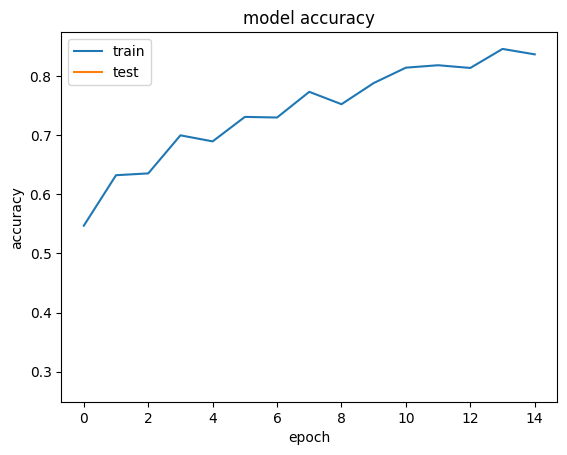

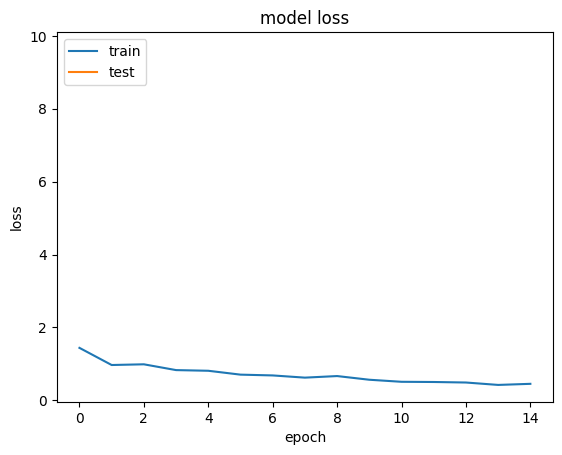

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **1.9. ResNet50 Model**

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
pretrained_model = ResNet50(
    input_shape=(224,224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
my_callbacks  = [EarlyStopping(monitor='val_loss',min_delta=0,patience=3,mode='auto')]

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1,
    steps_per_epoch=None,
    validation_steps=4
)

Epoch 1/10
62/62 [==============================] - ETA: 0s - loss: 0.8474 - accuracy: 0.6389

62/62 [==============================] - 35s 563ms/step - loss: 0.8474 - accuracy: 0.6389 - val_loss: 0.9225 - val_accuracy: 0.7778
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.8564 - accuracy: 0.6522

62/62 [==============================] - 31s 498ms/step - loss: 0.8564 - accuracy: 0.6522
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.8791 - accuracy: 0.6384

62/62 [==============================] - 31s 502ms/step - loss: 0.8791 - accuracy: 0.6384
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.8106 - accuracy: 0.6716

62/62 [==============================] - 32s 507ms/step - loss: 0.8106 - accuracy: 0.6716
Epoch 5/10
62/62 [==============================] - ETA: 0s - loss: 0.7986 - accuracy: 0.6747

62/62 [==============================] - 32s 514ms/step - loss: 0.7986 - accuracy: 0.6747
Epoch 6/10
62/62 [==============================] - ETA: 0s - loss: 0.7952 - accuracy: 0.6711

62/62 [==============================] - 31s 498ms/step - loss: 0.7952 - accuracy: 0.6711
Epoch 7/10
62/62 [==============================] - ETA: 0s - loss: 0.8014 - accuracy: 0.6736

62/62 [==============================] - 33s 527ms/step - loss: 0.8014 - accuracy: 0.6736
Epoch 8/10
62/62 [==============================] - ETA: 0s - loss: 0.7825 - accuracy: 0.6839

62/62 [==============================] - 31s 493ms/step - loss: 0.7825 - accuracy: 0.6839
Epoch 9/10
62/62 [==============================] - ETA: 0s - loss: 0.7355 - accuracy: 0.6910

62/62 [==============================] - 32s 508ms/step - loss: 0.7355 - accuracy: 0.6910
Epoch 10/10
62/62 [==============================] - ETA: 0s - loss: 0.7911 - accuracy: 0.6685

62/62 [==============================] - 32s 515ms/step - loss: 0.7911 - accuracy: 0.6685


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/MyModels/model_resnet50.h5')

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 [==============================] - 2s 2s/step - loss: 1.1001 - accuracy: 0.5000
Test Accuracy: 50.0


In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

NameError: ignored

## **2.Testing the Saved Model**

#### **2.1. CNN Model**

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_cnn=load_model('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_Cnn.h5')

Strawberry__Diseased


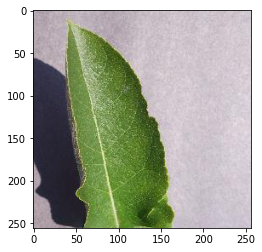

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/Colab Notebooks/dataset/plant__leaf/val/Apple__Healthy/78e648c6-a360-4fa8-b8ab-1225b164b7fd___RS_HL 7243.JPG'
result_cnn = model_cnn.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

#### **2.2. VGG16 Model**

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_vgg16=load_model('/content/drive/MyDrive/Colab Notebooks/model/plant_disease_VGG16.h5')

Apple__Healthy


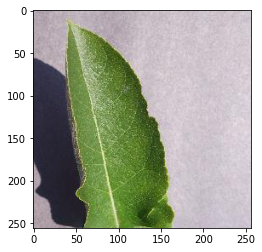

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/Colab Notebooks/dataset/plant__leaf/val/Apple__Healthy/78e648c6-a360-4fa8-b8ab-1225b164b7fd___RS_HL 7243.JPG'
result_vgg16 = model_vgg16.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg16,axis=1)
print(classes[classresult[0]])

#### **2.3. VGG19 Model**

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_vgg19=load_model('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_VGG19.h5')

Pepper_Healthy


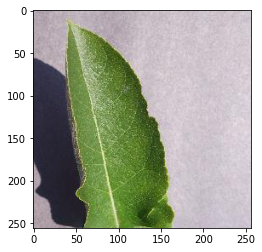

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/Colab Notebooks/dataset/plant__leaf/val/Apple__Healthy/78e648c6-a360-4fa8-b8ab-1225b164b7fd___RS_HL 7243.JPG'
result_vgg19 = model_vgg19.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg19,axis=1)
print(classes[classresult[0]])

#### **2.4. Inception Model**

In [43]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_inception=load_model('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_inception.h5')

1/1 [==============================] - 0s 29ms/step
diseased cotton plant


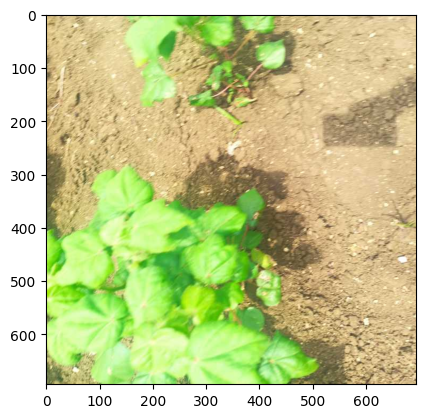

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/data/val/diseased cotton leaf/dis_leaf (253)_iaip.jpg'
result_inception = model_inception.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_inception,axis=1)
print(classes[classresult[0]])

#### **2.5. AlexNet Model**

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_alexnet=load_model('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_alexnet2.h5')

Pepper_Healthy


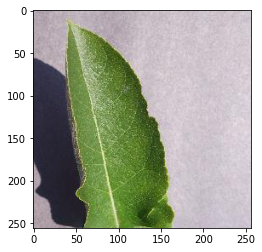

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/Colab Notebooks/dataset/plant__leaf/val/Apple__Healthy/78e648c6-a360-4fa8-b8ab-1225b164b7fd___RS_HL 7243.JPG'
result_alexnet = model_alexnet.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_alexnet,axis=1)
print(classes[classresult[0]])

#### **2.6. ResNet50 Model**

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_alexnet=load_model('/content/drive/MyDrive/Colab Notebooks/MyModels/model_resnet50.h5')

1/1 [==============================] - 2s 2s/step
fresh cotton leaf


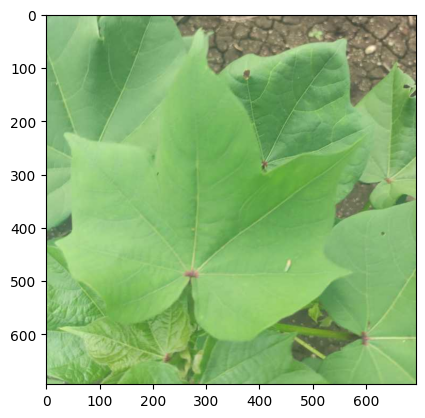

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/data/val/fresh cotton leaf/d (198)_iaip.jpg'
result_alexnet = model_alexnet.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_alexnet,axis=1)
print(classes[classresult[0]])

##2.7 **Efficientnet_model**

In [48]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.efficientnet import EfficientNetB0

# Define a custom_objects dictionary to specify how to handle custom layers
custom_objects = {'EfficientNetB0': EfficientNetB0}

# Load the model with the custom_objects dictionary
model_EfficentNet = load_model('/content/drive/MyDrive/Colab Notebooks/Model/plant_disease_efficientnet_model.h5', custom_objects=custom_objects)


ValueError: ignored

In [ ]:
classes=list(train_data_10_percent.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/data/val/fresh cotton leaf/d (198)_iaip.jpg'
result_efficentNet = model_alexnet.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_efficentNet,axis=1)
print(classes[classresult[0]])

NameError: ignored